Recitation 1: Encryption
========================

In this lab we will get hands-on experience with different encryption methods: The Caesar Cipher, AES, and RSA.

To begin, run this command in the terminal to install the required libraries: `pip install pycrypto rsa`

First, let's come up with a plaintext string which we will encrypt. Imagine this is some text we want to keep secret. Feel free to replace it with something else, but this exercise works best when it's about a paragraph long:

In [1]:
plaintext = (
    "The FitnessGram Pacer Test is a multistage aerobic capacity test that progressively gets more difficult as it continues. "
    "The 20 meter pacer test will begin in 30 seconds. Line up at the start. The running speed starts slowly, but gets faster each minute after you hear this signal. "
    "A single lap should be completed each time you hear this sound. Remember to run in a straight line, and run as long as possible.")

Part 1: Caesar Cipher
---------------------
We would like to encrypt this message so that only we can read it. Let's start off by using a caesar cypher: this is a simple method of scrambling a message, by shifting each character by a secret amount. So if the secret were three, "a" would shift three letters to become "d", "h" would become "k", and so on. We can define a function to do this given a plaintext string and a secret shift value:

In [2]:
import string

def caesar_cipher(plaintext: str, secret: int):
    # This function shifts a single character.
    def shift_char(char: str):
        # Ignore special characters.
        if char not in string.ascii_letters:
            return char

        # We need to do a little math so that letters at the end of the alphabet wrap around.
        if char.isupper():
            return chr((ord(char) - 65 + secret) % 26 + 65)
        else:
            return chr((ord(char) - 97 + secret) % 26 + 97)
    
    # Shift each character by the secret amount
    shifted_chars = [shift_char(char) for char in plaintext]

    # Join them back into a string
    return "".join(shifted_chars)

Now when we run the code below, we can see that we've scrambled the text, and nobody can read it without the secret key! ...right?

In [3]:
secret_key = 7

ciphertext = caesar_cipher(plaintext, secret_key)

print("Ciphertext:")
print("===========")
print(ciphertext)

Ciphertext:
Aol MpaulzzNyht Whjly Alza pz h tbsapzahnl hlyvipj jhwhjpaf alza aoha wyvnylzzpclsf nlaz tvyl kpmmpjbsa hz pa jvuapublz. Aol 20 tlaly whjly alza dpss ilnpu pu 30 zljvukz. Spul bw ha aol zahya. Aol ybuupun zwllk zahyaz zsvdsf, iba nlaz mhzaly lhjo tpubal hmaly fvb olhy aopz zpnuhs. H zpunsl shw zovbsk il jvtwslalk lhjo aptl fvb olhy aopz zvbuk. Yltltily av ybu pu h zayhpnoa spul, huk ybu hz svun hz wvzzpisl.


We can reverse the process by shifting backwards by the same amount. Only the same secret will work however, and shifting by a different amount will still result in scrambled text:

In [4]:
print("Plaintext:")
print("==========")
print(caesar_cipher(ciphertext, -secret_key))
print()
print("Incorrect plaintext (uses the wrong secret key):")
print("==========")
print(caesar_cipher(ciphertext, -secret_key + 1))

Plaintext:
The FitnessGram Pacer Test is a multistage aerobic capacity test that progressively gets more difficult as it continues. The 20 meter pacer test will begin in 30 seconds. Line up at the start. The running speed starts slowly, but gets faster each minute after you hear this signal. A single lap should be completed each time you hear this sound. Remember to run in a straight line, and run as long as possible.

Incorrect plaintext (uses the wrong secret key):
Uif GjuofttHsbn Qbdfs Uftu jt b nvmujtubhf bfspcjd dbqbdjuz uftu uibu qsphsfttjwfmz hfut npsf ejggjdvmu bt ju dpoujovft. Uif 20 nfufs qbdfs uftu xjmm cfhjo jo 30 tfdpoet. Mjof vq bu uif tubsu. Uif svoojoh tqffe tubsut tmpxmz, cvu hfut gbtufs fbdi njovuf bgufs zpv ifbs uijt tjhobm. B tjohmf mbq tipvme cf dpnqmfufe fbdi ujnf zpv ifbs uijt tpvoe. Sfnfncfs up svo jo b tusbjhiu mjof, boe svo bt mpoh bt qpttjcmf.


Part 1a: Brute Forcing
---------------------
So far, this cipher can scramble a message so it cannot be read, and it can only be unscrambled with the secret key. We're secure now, right? Well, not really. For one thing, there's only 25 possible shifts you can make before the characters loop back around. An attacker could simply try each one and see which one is correct. Below is some unknown ciphertext, see if you can figure out what it is just by iterating through all 25 shifts:

In [8]:
unknown_ciphertext = "Aipp, xlex aew vieppc iewc xs fvieo."
print(caesar_cipher(unknown_ciphertext, -4))

Well, that was really easy to break.


Part 1b: Frequency Analysis
--------------------------

The small number of possiblities isn't the only problem, however. The Caesar Cipher does not scramble the characters very much, and there are a lot of patterns that we can use to determine the secret key. One tactic is frequency analysis: looking at which letters show up most often. The English language uses some letters more than others, so letters like "E", "A", and "T" are very common while letters like "Z", "X", and "J" are almost never used. We can find these frequencies online, and graph the result:

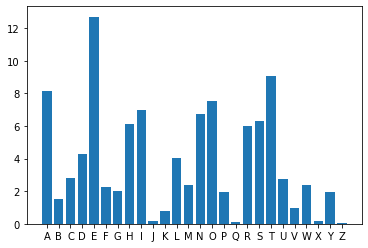

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

letter_frequencies = {
    'A': 8.167,
    'B': 1.492,
    'C': 2.782,
    'D': 4.253,
    'E': 12.702,
    'F': 2.228,
    'G': 2.015,
    'H': 6.094,
    'I': 6.996,
    'J': 0.153,
    'K': 0.772,
    'L': 4.025,
    'M': 2.406,
    'N': 6.749,
    'O': 7.507,
    'P': 1.929,
    'Q': 0.095,
    'R': 5.987,
    'S': 6.327,
    'T': 9.056,
    'U': 2.758,
    'V': 0.978,
    'W': 2.360,
    'X': 0.150,
    'Y': 1.974,
    'Z': 0.074
}

plt.bar(letter_frequencies.keys(), letter_frequencies.values())

plt.show()

Now, let's write a function to show the letter frequencies of a particular piece of text, and pass it the plaintext and the ciphertext from earlier:

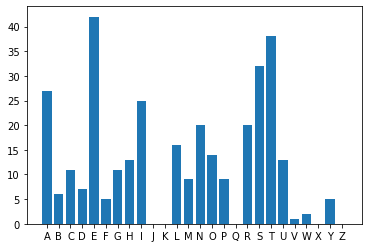

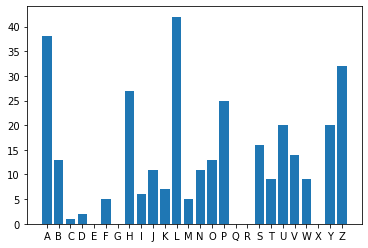

In [ ]:
from collections import Counter
import base64

def show_frequencies(s: str):
    character_counts = Counter(s.upper())

    plt.bar(list(string.ascii_uppercase), [character_counts.get(char, 0) for char in string.ascii_uppercase])
    plt.show()

show_frequencies(plaintext)
show_frequencies(ciphertext)

The plaintexttext (the first graph) should look very to the average English Language frequency from before! The ciphertext (the second graph) looks different, however: because we are changing each character by the same amount, the graph has been shifted. However, it is easy to tell how far it was shifted just by looking at it! By looking at the very common or very uncommon letters, it is possible to tell how far they have shifted between the two graphs. This number is the supposedly "secret" key! Below is a large block of new ciphertext, and you are not given the secret key. See if you can calculate the key by looking at the frequency graph, without brute-forcing it.

In [9]:
new_ciphertext = (
    "Nby ZcnhymmAlug Juwyl Nymn cm u gofncmnuay uylivcw wujuwcns nymn nbun jlialymmcpyfs aynm gily xczzcwofn um cn wihnchoym. "
    "Nby 20 gynyl juwyl nymn qcff vyach ch 30 mywihxm. Fchy oj un nby mnuln. Nby lohhcha mjyyx mnulnm mfiqfs, von aynm zumnyl yuwb gchony uznyl sio byul nbcm mcahuf. "
    "U mchafy fuj mbiofx vy wigjfynyx yuwb ncgy sio byul nbcm miohx. Lygygvyl ni loh ch u mnlucabn fchy, uhx loh um fiha um jimmcvfy.")

show_frequencies(new_ciphertext)

NameError: name 'show_frequencies' is not defined

Part 2: AES
===========

We can see that the Caesar Cipher is not a useful method of keeping data safe. Instead, we will use the more complex AES cipher. The AES cipher performs a much more complicated operation than simply shifting the character, which we won't go into depth on here, but suffice to say it leaves the output sufficiently scrambled. It also uses a much longer secret: a string of bits, which can be as long as necessary to ensure security.

In [10]:
from Crypto.Cipher import AES

# Rather than an integer, the secret is now a long string of bytes (length must be a power of 2)
secret = 'GZktMap1FgML5sa2'
aes_cipher = AES.new(secret, AES.MODE_ECB)

# Add padding to make the string 16 characters long
padding = '0' * (16 - (len(plaintext) % 16))

aes_ciphertext = aes_cipher.encrypt(plaintext + padding)

print(aes_ciphertext)

ModuleNotFoundError: No module named 'Crypto'

We can see immidiately that the output is far more scrambled than before. There is no resembalance to the original string. We can still decrypt this by reversing the operation, but doing so requires the same secret as before. Using the wrong secret fails to decrypt the ciphertext, and the result is still scrambled!

In [11]:
print('Original secret')
print('===============')
print(AES.new(key=secret, mode=AES.MODE_ECB).decrypt(aes_ciphertext))
print()
print('Incorrect secret')
print('================')
print(AES.new(key='thisisincorrect!', mode=AES.MODE_ECB).decrypt(aes_ciphertext))

Original secret


NameError: name 'AES' is not defined

Because the secret is now a long string and not a small integer, brute-forcing the secret is much harder. This secret is 128 bits long, meaning there are **340,282,366,920,938,463,463,374,607,431,768,211,456** possible secrets! Here is one last piece of ciphertext, see if you can reverse it without knowing the secret.

In [12]:
new_aes_ciphertext = (
    b"K\xa6\tz\xd5Q\x11\x07\xc9\xa5\x19pX\xbb\xd4\x1e\xcb\x99\xfbow&\xfdy\xcc\x1e\xf1\xc4\x999V\xb8\xb6\x1d\xbf\x7f\xc9\xbe\xf6"
    b"\xd5\x10\xbc\x07|0\xb3O\xd2\x07\x99\xfcr\x05\xd9\xc6\xc8\xae\xdb\xe3\xc7g\xde%\x02\xfb\xfe\xb4\x86\xa3\xa2\x1c\xd0h\xb3\xd6"
    b"oT;\x1fo\xb4\xef\x7f^M\xaa1\x8di\x16o\xceg|\\\xfc\t\xcc\x8f\x10\xc9\xb7\x120g?/\xb0\xc5\xd5\xfc\x1bJI!\x00\xfd\xdd\x94\xe6,"
    b"(\xc2\x0fJ\x96\xdc\xca\xd3^\xc3\xe7\x86\xd5\xe2\x95\xe9\xbfnh\xd0\xce\xf1;")

secret = '????????????????'
aes_cipher = AES.new(secret, AES.MODE_ECB)

print(aes_cipher.decrypt(new_aes_ciphertext))


NameError: name 'AES' is not defined

Part 3: RSA
===========

While AES is much better at protecting data than a Caesar Cipher, it still has one drawback: It is a **symmetric** algorithm, meaning it is encrypted and decrypted using the same secret key. While we can generate our own secret keys, we have no good way of sending them to the party we want to communicate with! Anyone listening in can simply steal the unencrypted secret, before we have a chance to set up our encryption at all. To solve this, we will use a third Cipher system: RSA. RSA is **asymmetric**, meaning the key we use to encrypt data cannot be used to decrypt it again. The code below will generate two of these keys: a public and a private key. The public key can be used to encrypt a message, which only the private key can unlock.

In [13]:
import rsa

print("Calculating key pair...")
public_key, private_key = rsa.newkeys(2048)

print("Public Key")
print("==========")
print(public_key)
print()
print("Private Key")
print("==========")
print(private_key)

ModuleNotFoundError: No module named 'rsa'

Notice how each key is simply a very large number! Also notice that it takes a moment to generate- calculating these numbers is relatively slow. If you change the code above to use an even stronger 4096-bit key, it might even take minutes! Because of this, they are rarely used to transmit large amounts of data. In fact, they are limited to a certain amount of data that is less than the number of bits in the key! If we try encoding the original plaintext, we will see that it doesn't work.

In [8]:
rsa.encrypt(plaintext.encode(), public_key) # This will fail (input is too large)


OverflowError: 410 bytes needed for message, but there is only space for 245

Because RSA is so slow, it is rarely used to transmit data. However, it can securely transmit the secret key for a symmetric encryption algorithm (like AES from part 1), and that symmetric algorithm can then be used to transmit the data. Imagine a conversation between Alice and Bob. Alice starts by sharing her public key with Bob. Bob then encrypts the symmetric key, and sends it back. Even if an attacker records Alice's public key, and the encrypted symmetric key that Bob sends back, they still can't decrypt it. This is because the public key can only be used to encode a message, not decode it! The only person who can decode it is Alice, who is the only person with the corrosponding private key. Even Bob can't decrypt it, even though he was the one who encrypted it! (Try it for yourself by replacing the private key below with the public key when decoding- it won't work)

In [12]:
# ===
# Assume Alice has already generated public_key and private_key using the code from before.
# Alice then sends public_key to Bob, who runs the following code:
# ===

symmetric_key = 'GZktMap1FgML5sa2'

rsa_ciphertext = rsa.encrypt(symmetric_key.encode(), public_key)
print('Encrypted symmetric key')
print('=======================')
print(rsa_ciphertext)

# ===
# After encrypting the symmetric key, Bob then sends back rsa_ciphertext to Alice.
# At this point, anyone listening in will know public_key and rsa_ciphertext, but cannot use those to decrypt the symmetric key!
# Only Alice can, using the private_key and the following code:
# ===

rsa_plaintext = rsa.decrypt(rsa_ciphertext, private_key)
print('Decrypted symmetric key')
print('=======================')
print(rsa_plaintext)

Encrypted symmetric key
b'E\xd5\xb4*\x10Jq\xbcmbgKW\x13\x01\x8d\xa2l<\xf3I\xc6U\xeb\xaeC\xbe\x05\xae\xea\xcf\x06\x84\xaa\xba6\xab\x1b\x7f\xeai\xb7\xd6=S\xc5\x12\x06h\xffbp0\xcc\xe4\x0c3\x1b\xeb\x9d\x01\xdd\xeec\xd1\x18h\x98\xe6eF\xb8\xfa\'\x92O177s\x8e\x17\xf7\xbcM|ow\xa2JP\x19\xf5\x1ea\x0e*\xb8\xe2\xe6\xb3S\x98\x1d$FJ\xf5\xdb\x96\x8d9\xf7\xa1\xbf\xe7+B,\xa4\xc4A\x10\x99>\x1eS\x17\x0b&H\xc5\x90\xc1\x8a\x00\x8b1\x80R]\xd6\xb0XH\x82/\xec\x89pb.\x02\xb7\xd9\xb3\xbe\x8e"\xcez9C\xb9\xb3[Z\x17\xc4\x03%\xb6\x8f-\xc8\xc4B\xf0\xfbq\xb6\xed\xfe\xf9\x00\xad+\xf5fb\x13aO\x87\xfa:\xd9\xe3\x1a \x80\x0b\x84\x9fW\xf8~\xa7\x0b\xc0\x1a\x99\x00\xa9\xb0\x9a\xfb9\xcdr4J\xf9\x12\x8dk\xd6\xf4\x17\x92\xfa\xa0/\xc4<\xc5"\xf1\x04t\x02\xb7\n\\[/5c\nu\x99\xfc\xcb\x03\x13\x9e'
Decrypted symmetric key
b'GZktMap1FgML5sa2'


Once Alice and Bob use this to share a secret, they can use that shared secret to establish a symmetric AES encryption channel to send their data.